# **Abstraction** vs **Encapsulation**
> `Abstraction` is about *creating* a simple interface for complex behavior. It focuses on **what** is exposed (*public*)

> `Encapsulation` is about *hiding* internal state. It focuses on **tucking away** the implementation details (*private*)

**`Abstraction`** is more about reducing *complexity*, **`encapsulation`** is more about *maintaining* the integrity of *system internals*

---
For example, the **random library** have **`abstracted`** the complexity of getting a true random number, and **`encapsulated`** it within the simple **randrange** function:

In [2]:
import random
attack_damage = random.randrange(5)
print(attack_damage)

3


When writing libraries, **`abstractions`** are critical, because changing the input parameters, for example, would break existing code.

---
In the following case, I will **`abstract`** the human's move, by **`encapsulating`** the variables, and showing the changes in the **method**

In [3]:
class Human:
    def __init__(self, pos_x, pos_y, speed):
        self.__pos_x = pos_x
        self.__pos_y = pos_y
        self.__speed = speed

    def move_right(self):
        self.__pos_x += self.__speed
        pass

    def move_left(self):
        self.__pos_x -= self.__speed
        pass

    def move_up(self):
        self.__pos_y += self.__speed
        pass

    def move_down(self):
        self.__pos_y -= self.__speed
        pass

    def get_position(self):
        position_tuple = (self.__pos_x,self.__pos_y)
        return position_tuple
        pass
#checking
human = Human(0, 0, 20)
human.move_down()
human.move_up()
human.move_right()
result = human.get_position()
print(result)

(20, 0)


In [12]:
run_cases = [
    (0, 0, 5, "left", -5, 0),
    (0, 0, 5, "right", 5, 0),
    (0, 0, 5, "up", 0, 5),
]

submit_cases = run_cases + [
    (0, 0, 5, "down", 0, -5),
    (10, 10, 2, "left", 8, 10),
    (10, 10, 2, "right", 12, 10),
    (10, 10, 2, "up", 10, 12),
    (10, 10, 2, "down", 10, 8),
]


def test(pos_x, pos_y, speed, move_direction, expected_output_x, expected_output_y):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * pos_x: {pos_x}")
    print(f" * pos_y: {pos_y}")
    print(f" * speed: {speed}")
    print(f" * move_direction: {move_direction}")
    expected_output = (expected_output_x, expected_output_y)
    human = Human(pos_x, pos_y, speed)
    if move_direction == "left":
        human.move_left()
    elif move_direction == "right":
        human.move_right()
    elif move_direction == "up":
        human.move_up()
    elif move_direction == "down":
        human.move_down()
    result = human.get_position()
    print(f"Expected x: {expected_output_x}")
    print(f"Actual   x: {result[0]}")
    print(f"Expected y: {expected_output_y}")
    print(f"Actual   y: {result[1]}")
    if result == expected_output:
        return True
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            print("Pass")
            passed += 1
        else:
            print("Fail")
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * pos_x: 0
 * pos_y: 0
 * speed: 5
 * move_direction: left
Expected x: -5
Actual   x: -5
Expected y: 0
Actual   y: 0
Pass
---------------------------------
Inputs:
 * pos_x: 0
 * pos_y: 0
 * speed: 5
 * move_direction: right
Expected x: 5
Actual   x: 5
Expected y: 0
Actual   y: 0
Pass
---------------------------------
Inputs:
 * pos_x: 0
 * pos_y: 0
 * speed: 5
 * move_direction: up
Expected x: 0
Actual   x: 0
Expected y: 5
Actual   y: 5
Pass
---------------------------------
Inputs:
 * pos_x: 0
 * pos_y: 0
 * speed: 5
 * move_direction: down
Expected x: 0
Actual   x: 0
Expected y: -5
Actual   y: -5
Pass
---------------------------------
Inputs:
 * pos_x: 10
 * pos_y: 10
 * speed: 2
 * move_direction: left
Expected x: 8
Actual   x: 8
Expected y: 10
Actual   y: 10
Pass
---------------------------------
Inputs:
 * pos_x: 10
 * pos_y: 10
 * speed: 2
 * move_direction: right
Expected x: 12
Actual   x: 12
Expected y: 10
Actual   y: 10
Pass
--------

The terms **`abstraction`** and **`encapsulation`** mostly just emphasize different aspects of the same concept:

>**`Abstraction`** focuses on exposing essential features while hiding complexity
>**`Encapsulation`** focuses on bundling data with methods and restricting direct acces to implementation details

Creating good **`abstractions`** is *crucial* when developing libraries, to hide the complexity of the working process

---
In the following example, I will create the '*sprint*' movement, which allows humans to move twice as fast, but requiring **__stamina**. Ir sprints, it loses stamina. Once it is out of stamina, it cannot longer sprint

In [7]:
#This was already defined above (class Human, get_position, move_right,etc.)
class Human:
    def __init__(self, pos_x, pos_y, speed, stamina):
        self.__pos_x = pos_x
        self.__pos_y = pos_y
        self.__speed = speed
        self.__stamina = stamina
    
    def move_right(self):
        self.__pos_x += self.__speed

    def move_left(self):
        self.__pos_x -= self.__speed

    def move_up(self):
        self.__pos_y += self.__speed

    def move_down(self):
        self.__pos_y -= self.__speed

    def get_position(self):
        position_tuple = (self.__pos_x,self.__pos_y)
        return position_tuple
#New code added in this phase 
#------------------------------------------------------------------
    def sprint_right(self):
        self.__raise_if_cannot_sprint()
        self.__pos_x += (self.__speed*2)
        self.__use_sprint_stamina()
        pass

    def sprint_left(self):
        self.__raise_if_cannot_sprint()
        self.__pos_x -= (self.__speed*2) 
        self.__use_sprint_stamina()
        pass

    def sprint_up(self):
        self.__raise_if_cannot_sprint()
        self.__pos_y += (self.__speed*2)
        self.__use_sprint_stamina()
        pass

    def sprint_down(self):
        self.__raise_if_cannot_sprint()
        self.__pos_y -= (self.__speed*2) 
        self.__use_sprint_stamina()
        pass

    def __raise_if_cannot_sprint(self):
        if self.__stamina <= 0:
            raise ValueError("not enough stamina to sprint") 
        pass

    def __use_sprint_stamina(self):
        self.__stamina -= 1
        pass

In [8]:

run_cases = [
    ((0, 0, 5, 3), ["sprint_right"], (10, 0, None)),
    (
        (0, 0, 20, 3),
        [
            "sprint_left",
            "sprint_left",
            "sprint_left",
        ],
        (-120, 0, None),
    ),
    (
        (1, 1, 3, 1),
        ["sprint_down", "sprint_right"],
        (1, -5, "not enough stamina to sprint"),
    ),
]


submit_cases = run_cases + [
    (
        (1, 1, 5, 2),
        ["sprint_left", "sprint_up", "sprint_down"],
        (-9, 11, "not enough stamina to sprint"),
    ),
]


def test(human_args, methods, expected_output):
    print("---------------------------------")
    print(f"Starting values:")
    human = Human(*human_args)
    print(f" * x: {human_args[0]}")
    print(f" * y: {human_args[1]}")
    print(f" * speed: {human_args[2]}")
    print(f" * stamina: {human_args[3]}")
    for method in methods:
        print(f" - calling {method}...")
    try:
        for method in methods:
            getattr(human, method)()
        actual_x, actual_y = human.get_position()
        actual_err = None
    except Exception as e:
        actual_x, actual_y = human.get_position()
        actual_err = str(e)
    expected_x, expected_y, expected_error = expected_output
    print(f"Expected x: {expected_x}")
    print(f"Actual   x: {actual_x}")
    print(f"Expected y: {expected_y}")
    print(f"Actual   y: {actual_y}")
    print(f"Expected error: {expected_error}")
    print(f"Actual   error: {actual_err}")
    if (
        actual_x == expected_x
        and actual_y == expected_y
        and actual_err == expected_error
    ):
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Starting values:
 * x: 0
 * y: 0
 * speed: 5
 * stamina: 3
 - calling sprint_right...
Expected x: 10
Actual   x: 10
Expected y: 0
Actual   y: 0
Expected error: None
Actual   error: None
Pass
---------------------------------
Starting values:
 * x: 0
 * y: 0
 * speed: 20
 * stamina: 3
 - calling sprint_left...
 - calling sprint_left...
 - calling sprint_left...
Expected x: -120
Actual   x: -120
Expected y: 0
Actual   y: 0
Expected error: None
Actual   error: None
Pass
---------------------------------
Starting values:
 * x: 1
 * y: 1
 * speed: 3
 * stamina: 1
 - calling sprint_down...
 - calling sprint_right...
Expected x: 1
Actual   x: 1
Expected y: -5
Actual   y: -5
Expected error: not enough stamina to sprint
Actual   error: not enough stamina to sprint
Pass
---------------------------------
Starting values:
 * x: 1
 * y: 1
 * speed: 5
 * stamina: 2
 - calling sprint_left...
 - calling sprint_up...
 - calling sprint_down...
Expected x: -9
Actual   x:

# How OPP developers think
**`Classes`** in OOP are all about grouping *data and behavior* together in one place, and a programmer tend to think about programming as a modeling problem:
> How can I write **`human`** class that holds **data** and simulates **behaviour** of a real human

On the other hand, **`functional`** programmers tend to think of the code as I/O, and how those inputs and outputs transition the world from one state to the next:
> When a human takes a step, what is the next **`state`** of the game?

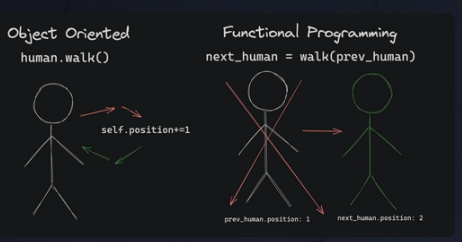

---
## Last example: **prototype card game**


In [36]:
import random

class DeckOfCards:
    #class variables
    SUITS = ["Hearts", "Diamonds", "Clubs", "Spades"]
    RANKS = ["Ace","2","3","4","5","6","7","8","9","10","Jack","Queen","King",]

    def __init__(self):
        self.__cards = self.create_deck()
        pass

    def create_deck(self):
        #Creating an empty temporary list to store all the deck
        deck = []
        for suit in self.SUITS:
            for rank in self.RANKS:
                deck.append((rank,suit))
        return deck
        pass

    def shuffle_deck(self):
        random.shuffle(self.__cards)
        return self.__cards
        pass

    def deal_card(self):
        if self.__cards == []:
            return None
        last_card = self.__cards.pop()
        return last_card
        pass

    def __str__(self):
        return f"The deck has {len(self.__cards)} cards"
cards = DeckOfCards()
deck = cards.create_deck()
print(deck)
print()
deck = cards.shuffle_deck()
print(deck)

[('Ace', 'Hearts'), ('2', 'Hearts'), ('3', 'Hearts'), ('4', 'Hearts'), ('5', 'Hearts'), ('6', 'Hearts'), ('7', 'Hearts'), ('8', 'Hearts'), ('9', 'Hearts'), ('10', 'Hearts'), ('Jack', 'Hearts'), ('Queen', 'Hearts'), ('King', 'Hearts'), ('Ace', 'Diamonds'), ('2', 'Diamonds'), ('3', 'Diamonds'), ('4', 'Diamonds'), ('5', 'Diamonds'), ('6', 'Diamonds'), ('7', 'Diamonds'), ('8', 'Diamonds'), ('9', 'Diamonds'), ('10', 'Diamonds'), ('Jack', 'Diamonds'), ('Queen', 'Diamonds'), ('King', 'Diamonds'), ('Ace', 'Clubs'), ('2', 'Clubs'), ('3', 'Clubs'), ('4', 'Clubs'), ('5', 'Clubs'), ('6', 'Clubs'), ('7', 'Clubs'), ('8', 'Clubs'), ('9', 'Clubs'), ('10', 'Clubs'), ('Jack', 'Clubs'), ('Queen', 'Clubs'), ('King', 'Clubs'), ('Ace', 'Spades'), ('2', 'Spades'), ('3', 'Spades'), ('4', 'Spades'), ('5', 'Spades'), ('6', 'Spades'), ('7', 'Spades'), ('8', 'Spades'), ('9', 'Spades'), ('10', 'Spades'), ('Jack', 'Spades'), ('Queen', 'Spades'), ('King', 'Spades')]

[('Jack', 'Diamonds'), ('8', 'Hearts'), ('10', 'D

In [37]:
run_cases = [
    ("shuffle_deck", 3, [("9", "Hearts"), ("Jack", "Clubs"), ("10", "Spades")]),
    (
        "deal_card",
        4,
        [("King", "Spades"), ("Queen", "Spades"), ("Jack", "Spades"), ("10", "Spades")],
    ),
    ("deal_card", 3, [("King", "Spades"), ("Queen", "Spades"), ("Jack", "Spades")]),
]

submit_cases = run_cases + [
    ("shuffle_deck", 3, [("9", "Hearts"), ("Jack", "Clubs"), ("10", "Spades")]),
    (
        "deal_card",
        4,
        [("King", "Spades"), ("Queen", "Spades"), ("Jack", "Spades"), ("10", "Spades")],
    ),
    ("deal_card", 3, [("King", "Spades"), ("Queen", "Spades"), ("Jack", "Spades")]),
    ("shuffle_deck", 3, [("9", "Hearts"), ("Jack", "Clubs"), ("10", "Spades")]),
    ("deal_card", 3, [("King", "Spades"), ("Queen", "Spades"), ("Jack", "Spades")]),
    (
        "deal_card",
        53,
        [
            ("King", "Spades"),
            ("Queen", "Spades"),
            ("Jack", "Spades"),
            ("10", "Spades"),
            ("9", "Spades"),
            ("8", "Spades"),
            ("7", "Spades"),
            ("6", "Spades"),
            ("5", "Spades"),
            ("4", "Spades"),
            ("3", "Spades"),
            ("2", "Spades"),
            ("Ace", "Spades"),
            ("King", "Clubs"),
            ("Queen", "Clubs"),
            ("Jack", "Clubs"),
            ("10", "Clubs"),
            ("9", "Clubs"),
            ("8", "Clubs"),
            ("7", "Clubs"),
            ("6", "Clubs"),
            ("5", "Clubs"),
            ("4", "Clubs"),
            ("3", "Clubs"),
            ("2", "Clubs"),
            ("Ace", "Clubs"),
            ("King", "Diamonds"),
            ("Queen", "Diamonds"),
            ("Jack", "Diamonds"),
            ("10", "Diamonds"),
            ("9", "Diamonds"),
            ("8", "Diamonds"),
            ("7", "Diamonds"),
            ("6", "Diamonds"),
            ("5", "Diamonds"),
            ("4", "Diamonds"),
            ("3", "Diamonds"),
            ("2", "Diamonds"),
            ("Ace", "Diamonds"),
            ("King", "Hearts"),
            ("Queen", "Hearts"),
            ("Jack", "Hearts"),
            ("10", "Hearts"),
            ("9", "Hearts"),
            ("8", "Hearts"),
            ("7", "Hearts"),
            ("6", "Hearts"),
            ("5", "Hearts"),
            ("4", "Hearts"),
            ("3", "Hearts"),
            ("2", "Hearts"),
            ("Ace", "Hearts"),
            None,
        ],
    ),
]


def test(action, num_cards, expected):
    print("---------------------------------")
    print(f"Testing action: {action}, dealing {num_cards} cards")
    print(f"Expected Output:")
    print_cards(expected)
    deck = DeckOfCards()
    random.seed(1)
    result = []

    if action == "shuffle_deck":
        print("Shuffling deck...")
        deck.shuffle_deck()
        print(f"dealing {num_cards} cards")
        for _ in range(num_cards):
            result.append(deck.deal_card())

    elif action == "deal_card":
        for _ in range(num_cards):
            result.append(deck.deal_card())

    print(f"Actual Output:")
    print_cards(result)
    if result == expected:
        print("Pass")
        return True
    else:
        print("Fail")
        return False


def print_cards(cards):
    for card in cards:
        if card is None:
            print("* <None>")
        else:
            print(f"* {card[0]} of {card[1]}")


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Testing action: shuffle_deck, dealing 3 cards
Expected Output:
* 9 of Hearts
* Jack of Clubs
* 10 of Spades
Shuffling deck...
dealing 3 cards
Actual Output:
* 9 of Hearts
* Jack of Clubs
* 10 of Spades
Pass
---------------------------------
Testing action: deal_card, dealing 4 cards
Expected Output:
* King of Spades
* Queen of Spades
* Jack of Spades
* 10 of Spades
Actual Output:
* King of Spades
* Queen of Spades
* Jack of Spades
* 10 of Spades
Pass
---------------------------------
Testing action: deal_card, dealing 3 cards
Expected Output:
* King of Spades
* Queen of Spades
* Jack of Spades
Actual Output:
* King of Spades
* Queen of Spades
* Jack of Spades
Pass
---------------------------------
Testing action: shuffle_deck, dealing 3 cards
Expected Output:
* 9 of Hearts
* Jack of Clubs
* 10 of Spades
Shuffling deck...
dealing 3 cards
Actual Output:
* 9 of Hearts
* Jack of Clubs
* 10 of Spades
Pass
---------------------------------
Testing action: de